<div style="text-align: center;">
  <h1><strong>Credit Card Fraud Detection</strong></h1>
</div>

<div style="text-align: center;">
  <img src="https://cdn.prod.website-files.com/678b8171aaf08b155798f8fb/67b2c88c3ea1fd433bfc9de7_5-p-2000.png" alt="My centered image" width="1000" height="400"/>
</div>

### **Context**

In 2024, credit card fraud continues to be a major concern in the United States, with approximately 327,000 cases reported to the Federal Trade Commission (FTC) through the first three quarters of the year. For financial institutions, detecting fraud is critical for minimizing financial losses, ensuring regulatory compliance, protecting their reputation, and maintaining customer trust and retention. Traditional fraud detection methods often struggle to keep up with the evolving tactics of fraudsters. Machine learning (ML) techniques, however, offer significant advantages by identifying complex patterns and anomalies in transaction data, enabling more accurate and efficient detection of fraudulent activities. Implementing ML-driven solutions not only reduces financial losses but also enhances overall customer satisfaction by improving fraud prevention systems. 

### **Objective**

As a Data Scientist, our objective  is to develop and implement machine learning models that improve the accuracy and efficiency of credit card fraud detection.

### **Data Dictionary**

**fraduData.csv**

- index - Unique Identifier for each row
- trans_date_trans_time - Transaction DateTime
- cc_num - Credit Card Number of Customer
- merchant - Merchant Name
- category - Category of Merchant
- amt - Amount of Transaction
- first - First Name of Credit Card Holder
- last - Last Name of Credit Card Holder
- gender - Gender of Credit Card Holder
- street - Street Address of Credit Card Holder
- city - City of Credit Card Holder
- state - State of Credit Card Holder
- zip - Zip of Credit Card Holder
- lat - Latitude Location of Credit Card Holder
- long - Longitude Location of Credit Card Holder
- city_pop - Credit Card Holder's City Population
- job - Job of Credit Card Holder
- dob - Date of Birth of Credit Card Holder
- trans_num - Transaction Number
- unix_time - UNIX Time of transaction
- merch_lat - Latitude Location of Merchant
- merch_long - Longitude Location of Merchant
- is_fraud - Fraud Flag (Target Class)

In [1]:
# Importing necessary libraries for project - all libraries below are for numeric computations, dataframes, and data visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns
import os
pd.options.display.float_format = '{:.4f}'.format

# Importing library to remove warnings
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
# Import credit card transaction dataset with fraudulent identifier
data = pd.read_csv(r'C:\Users\Luis Alfredo\Documents\Data Science - Python\Datasets\FraudData.csv')

In [3]:
# Viewing the credit card transactions dataframe imported
data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.8600,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.9864,-81.2007,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.8400,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.4505,-109.9604,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.2800,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.4958,-74.1961,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.0500,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.8124,-80.8831,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.1900,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.9591,-85.8847,0


In [4]:
data.shape

(555719, 23)

In [5]:
# Checking data types and null values within the credit card transaction dataset
pd.options.display.max_info_rows = 150000000
pd.options.display.max_info_columns = 150000000

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  int64  
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

The dataset contains a variety of data types, with no null values. However, certain columns will not be relevant for building a predictive model. Specifically, columns such as first, last, cc_num, street, city, state, zip, dob, trans_num, and any "Unnamed" columns as they primarily serve as descriptive information about the credit card holder. While cc_num will be used as a unique identifier for individual users during exploratory data analysis, it will not be included in the model for prediction purposes.

In [6]:
# Observing the number unique values across each column
print('Unique Values by Column')
for col in data.columns[2:]:
    print(col + ': ' + str(len(data[col].unique())))

Unique Values by Column
cc_num: 924
merchant: 693
category: 14
amt: 37256
first: 341
last: 471
gender: 2
street: 924
city: 849
state: 50
zip: 912
lat: 910
long: 910
city_pop: 835
job: 478
dob: 910
trans_num: 555719
unix_time: 544760
merch_lat: 546490
merch_long: 551770
is_fraud: 2


Here we observe a total of 555,719 unique transactions associated with 924 distinct credit card holders. A validation of these transactions confirms the absence of any duplicates. Additionally, these transactions span across 693 unique merchants and are categorized into 14 distinct merchant categories. Further insights will be explored through detailed exploratory data analysis (EDA).

## **Exploratory Data Analysis**

### Univariate

In [7]:
# Quickly observing the distribution of unique values across each column
cat_var = data.drop(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'first', 'last', 'street', 'city', 'state', 'zip', 'trans_num', 'dob', 'amt', 'lat', 'long', 'city_pop', 'unix_time', 'merch_lat', 'merch_long'], axis = 1)

print('COLUMN COUNTS')

for col in cat_var.columns:
    x = round((80 - len(str(col)))/2)
    print('-'*x + str(col).upper() + '-'*x)
    print(cat_var[col].value_counts())

COLUMN COUNTS
------------------------------------MERCHANT------------------------------------
merchant
fraud_Kilback LLC                        1859
fraud_Cormier LLC                        1597
fraud_Schumm PLC                         1561
fraud_Kuhn LLC                           1521
fraud_Dickinson Ltd                      1519
                                         ... 
fraud_Treutel-King                        323
fraud_Satterfield-Lowe                    319
fraud_Kessler Group                       318
fraud_Jerde-Hermann                       312
fraud_Ritchie, Bradtke and Stiedemann     304
Name: count, Length: 693, dtype: int64
------------------------------------CATEGORY------------------------------------
category
gas_transport     56370
grocery_pos       52553
home              52345
shopping_pos      49791
kids_pets         48692
shopping_net      41779
entertainment     40104
personal_care     39327
food_dining       39268
health_fitness    36674
misc_pos          345

After looking at the distribution of transactions across each column, it reveals that out of the 555,719 transactions, only 2,145 were flagged as fraudulent. This represents less than 1% of the total transactions, meaning there is a significant class imbalance in the dataset. When we develop our model, this will be a very important factor to consider. To gain a clearer understanding of the data, we will visualize the distributions of these variables. 

In [8]:
# Quickly checking over statistics of the numeric datasets for a brief understanding of the data and also removing columns that are needed
data_counts = data.drop(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'first', 'last', 'street', 'city', 'state', 'zip', 'trans_num', 'dob'], axis = 1)

data_counts.describe()

,amt,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,555719.0000,555719.0000,555719.0000,555719.0000,555719.0000,555719.0000,555719.0000,555719.0000
mean,69.3928,38.5433,-90.2313,88221.8879,1380678865.1668,38.5428,-90.2314,0.0039
std,156.7459,5.0613,13.7218,300390.8921,5201104.0659,5.0958,13.7331,0.0620
min,1.0000,20.0271,-165.6723,23.0000,1371816865.0000,19.0274,-166.6716,0.0000
25%,9.6300,34.6689,-96.7980,741.0000,1376028627.5000,34.7553,-96.9051,0.0000
50%,47.2900,39.3716,-87.4769,2408.0000,1380761988.0000,39.3766,-87.4452,0.0000
75%,83.0100,41.8948,-80.1752,19685.0000,1385866984.0000,41.9542,-80.2646,0.0000
max,22768.1100,65.6899,-67.9503,2906700.0000,1388534374.0000,66.6793,-66.9520,1.0000


A quick review of the transaction statistics reveals that the mean transaction amount is approximately \\$69, with a maximum transaction of around \\$22,768. The median transaction amount is approximately \\$47, and the interquartile range is roughly \\$40, indicating a right-skewed distribution.

In [9]:
# Importing library to allow for geographical heatmaps
import geopandas as gpd

# File downloaded to replicate U.S. states via geopanda
states = gpd.read_file(r'C:\Users\Luis Alfredo\Documents\Data Science - Python\Datasets\us_states_shapefile\us-state-boundaries\us-state-boundaries.shp')

In [10]:
# Creating dataframe for the distribution of transactions by each state (excluding Hawaii and Alaska for geographical heat map)
states_count = data['state'].value_counts().to_frame().reset_index()
states_cont = states_count[(states_count['state'] != 'HI')&(states_count['state'] != 'AK')]
states_df_cont = states.merge(states_cont, left_on = 'stusab', right_on = 'state')

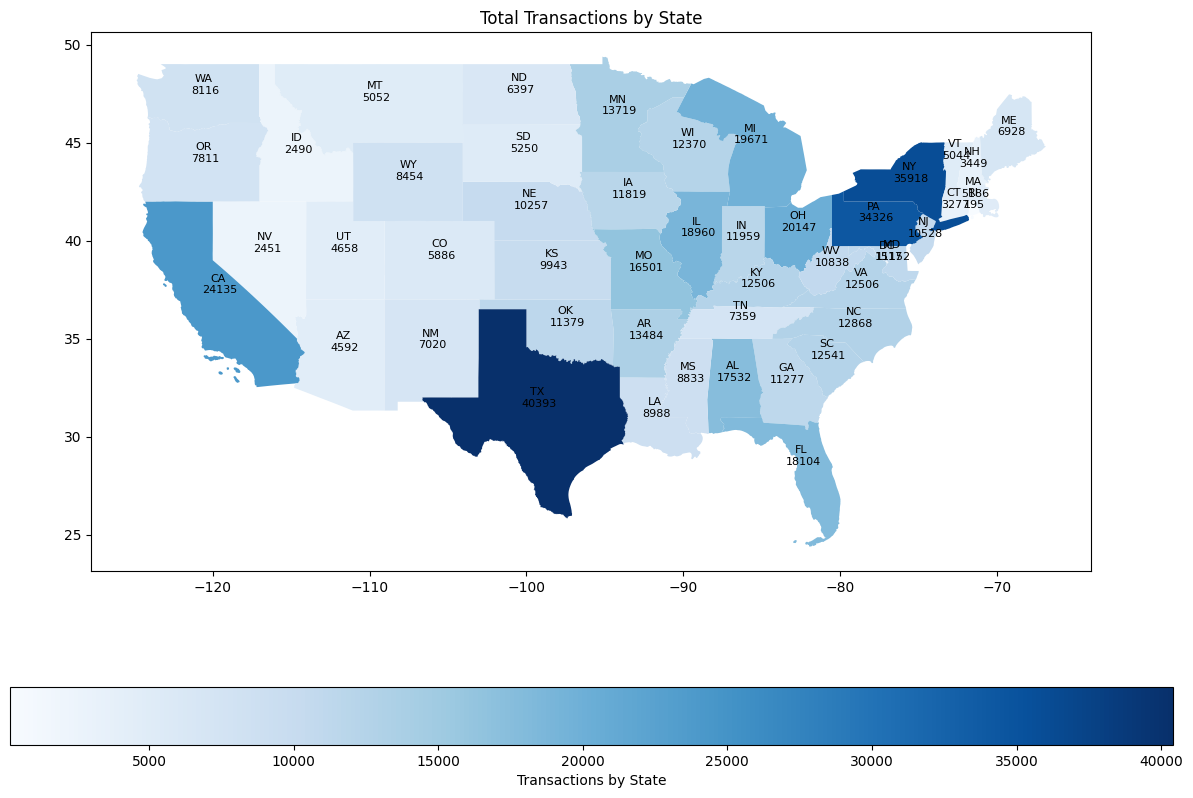

In [11]:
# Creating the layout of the figure for us to add a graph to
fig, ax = plt.subplots(1,1, figsize = (15, 10))

# Creating geographical heat map as our visualization to observe the distribution of transactions by state
states_df_cont.plot(column = 'count', ax = ax, legend = True, legend_kwds = {'label': 'Transactions by State', 'orientation': 'horizontal'}, cmap = 'Blues')

# Adding labels for each state 
for idx, row in states_df_cont.iterrows():
    x, y = row['geometry'].centroid.coords[0]
    ax.text(x + 0.1, y + 0.1, row['count'], fontsize = 8, ha = 'center', color = 'black')
    ax.text(x, y + .7, row['stusab'], fontsize = 8, ha = 'center', color = 'black')

plt.title('Total Transactions by State')
plt.show()

Based on our observations from the map, Texas has the highest number of transactions across all states. Additionally, the Midwest region of the United States consistently shows the highest transaction volume, followed by the Southern states. While Texas leads in total transactions, New York and Pennsylvania trail closely, with a difference of approximately 5,000 transactions.

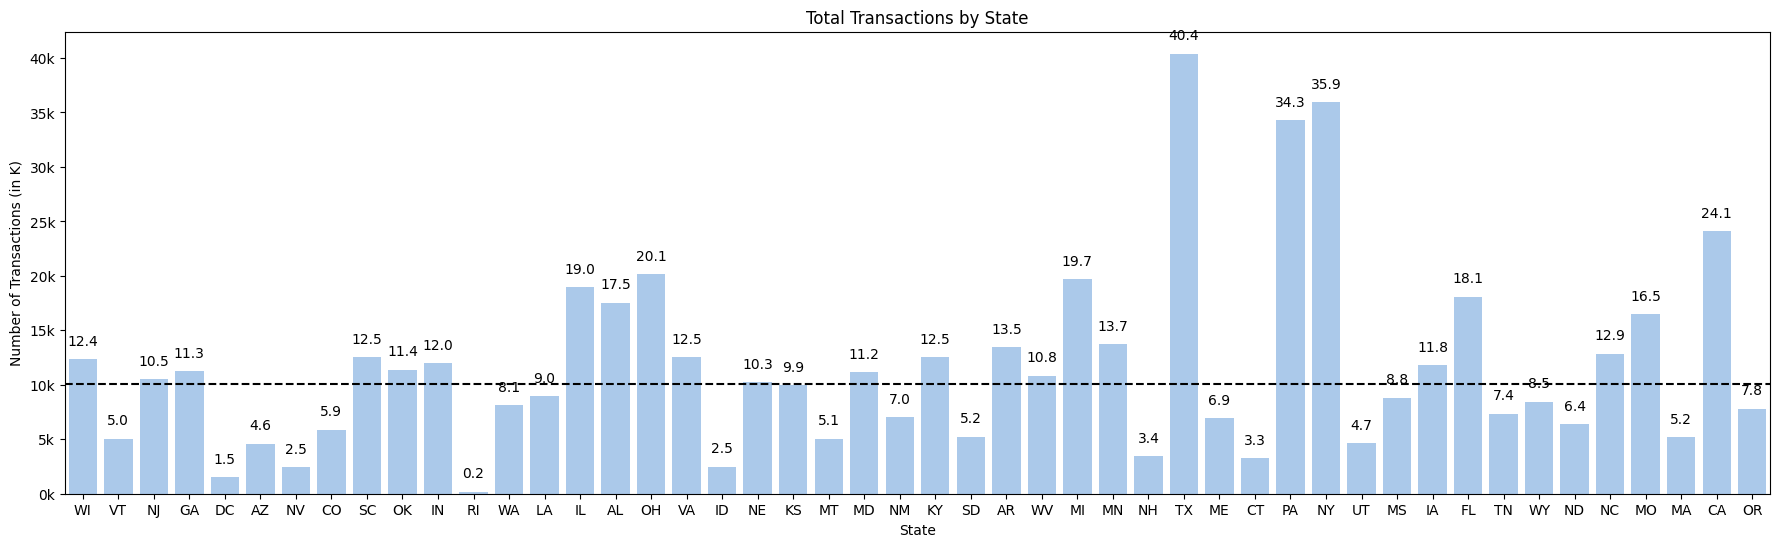

In [12]:
# Calculating the median of state transactions
median = np.median(states_count['count'])

# Creating the layout of the figure for us to add a graph to
fig, ax = plt.subplots(1,1, figsize = (22, 6))

# Creating bar plot as our graph to visualize the distribution
sns.barplot(x = states_df_cont['stusab'], y = states_df_cont['count'], ax = ax, color = sns.color_palette("pastel")[0])

# Function to format numeric values into thousands
def format_ticks(x, pos):
    return f'{int(x / 1000)}k'

# Adding labels above bars
for i, value in enumerate(states_df_cont['count']):
    plt.text(i, value + 1000, f'{round((value / 1000),1)}', ha = 'center', va = 'bottom', fontsize=10)

plt.gca().yaxis.set_major_formatter(FuncFormatter(format_ticks))
plt.axhline(median, color = 'black', linestyle = '--', label = f'Median: {median}')
plt.xlabel('State')
plt.ylabel('Number of Transactions (in K)')
plt.title('Total Transactions by State')
plt.show()

We observe that the median number of transactions per state is 10,000. However, states such as Rhode Island, Indiana, New Hampshire, Connecticut, Utah, and the District of Columbia (recognized as a state by the dataset, though not officially a state) have significantly fewer transactions, falling short by more than approximately 5,000 transactions.

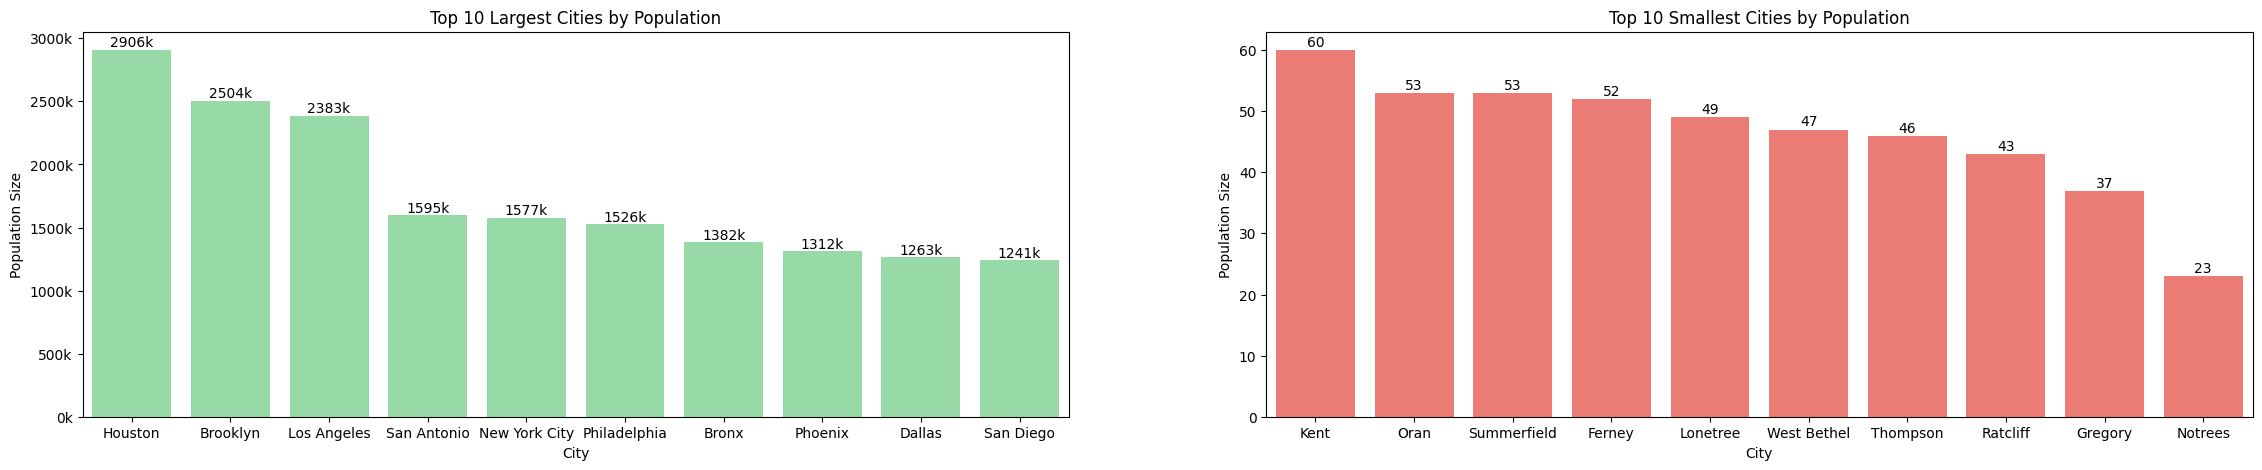

In [13]:
# Creating dataframe to sort and view the ten most populated cities and the ten least populated cities
city_population = data.drop_duplicates(subset=['city'])[['city','city_pop']].sort_values(by = ['city_pop'], ascending = False)
top_cities = city_population.iloc[:10]
lower_cities = city_population.iloc[-10:]

# Creating the layout of the figure for us to add the graphs to
fig, ax = plt.subplots(1, 2, figsize = (28,5))

# Creating bar plots as our graphs to visualize city population dataframes
sns.barplot(data = top_cities, y = top_cities['city_pop'], x = top_cities['city'], ax = ax[0], color = sns.color_palette("pastel")[2])
sns.barplot(data = lower_cities, y = lower_cities['city_pop'], x = lower_cities['city'], ax = ax[1], color = "#ff6961")

# Adding labels above bars to both graphs
for i, value in enumerate(top_cities['city_pop']):
    ax[0].text(i, value + 1500, f'{int(value / 1000)}k', ha = 'center', va = 'bottom', fontsize=10)

for i, value in enumerate(lower_cities['city_pop']):
    ax[1].text(i, value + 0.1, f'{int(value)}', ha = 'center', va = 'bottom', fontsize=10)

ax[0].yaxis.set_major_formatter(FuncFormatter(format_ticks))
ax[0].set_ylabel('Population Size')
ax[0].set_xlabel('City')
ax[0].set_title('Top 10 Largest Cities by Population')
ax[1].set_ylabel('Population Size')
ax[1].set_xlabel('City')
ax[1].set_title('Top 10 Smallest Cities by Population')
plt.show()

When observing the top ten cities with the largest and smallest populations, Houston ranks as the city with the largest population, while Notrees has the smallest. Important to note that both Texas and New York each contain three of the largest cities by population, which likely explains why these two states have the highest transaction volumes.

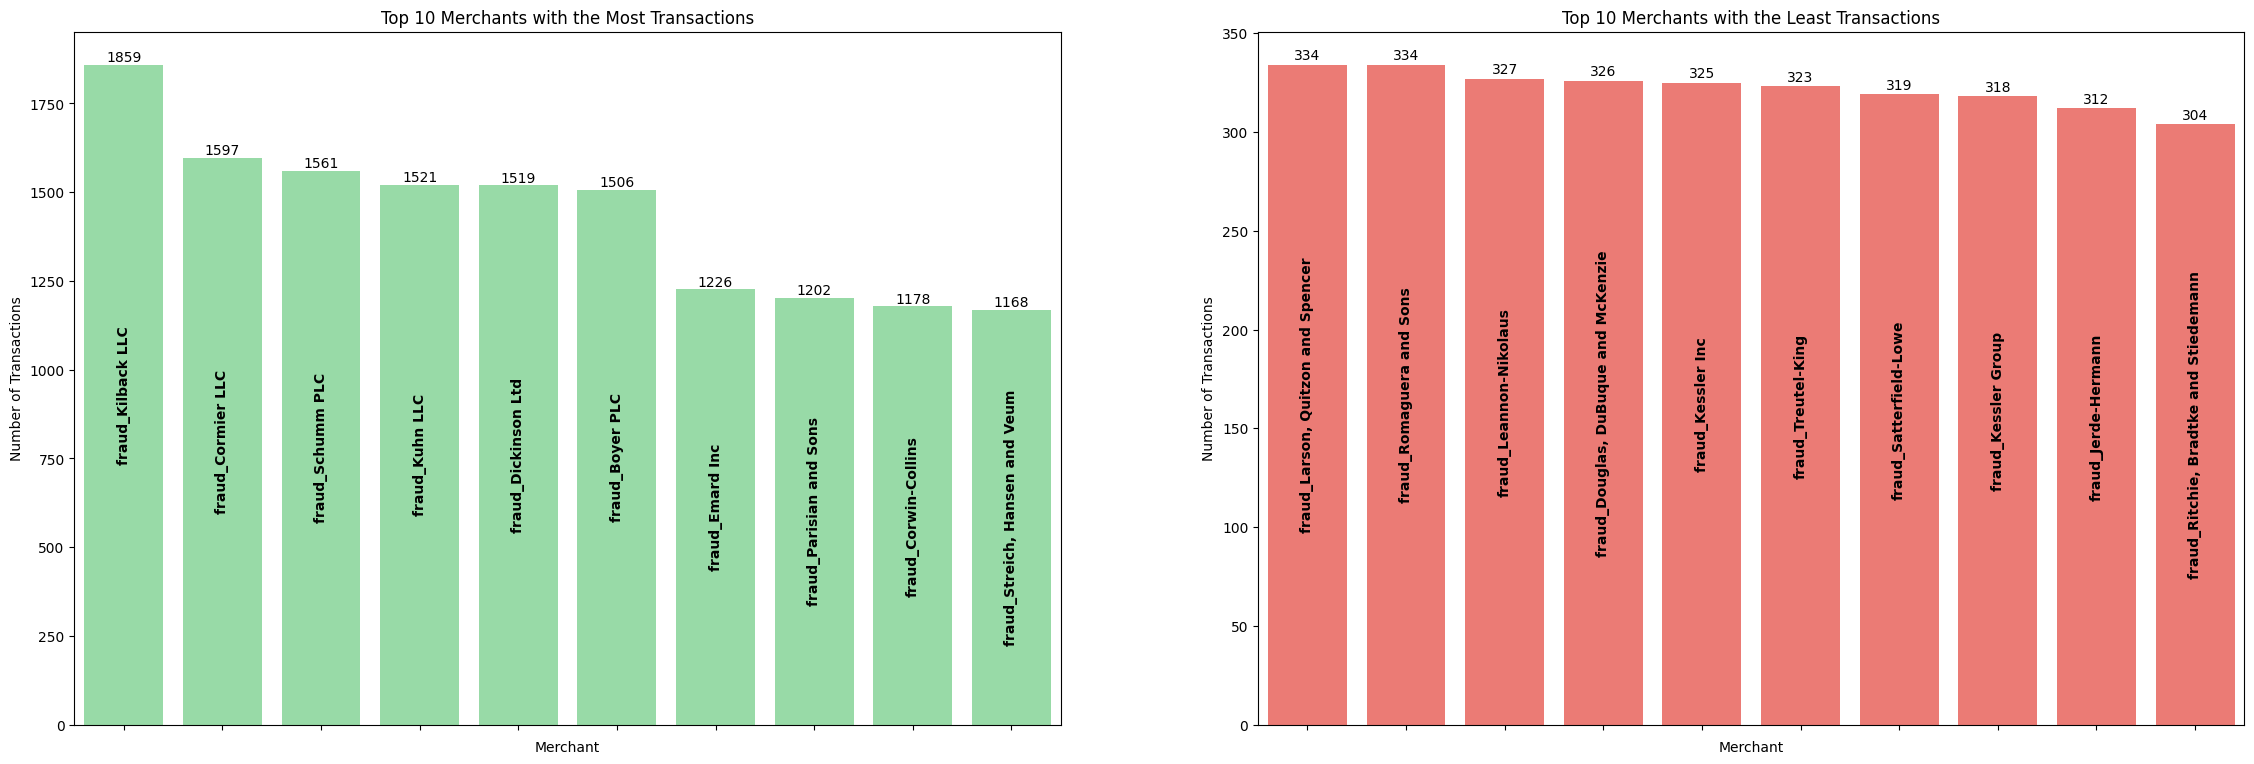

In [14]:
# Creating dataframe to sort and view the top ten merchants with most transactions and top ten merchants with the least transactions
merchants = data['merchant'].value_counts().to_frame().reset_index().sort_values(by = ['count'], ascending = False)
top_merchants = merchants.iloc[:10]
lower_merchants = merchants.iloc[-10:]

# Creating the layout of the figure for us to add the graphs to
fig, ax = plt.subplots(1, 2, figsize = (28, 9))

# Creating bar plots as our graphs to visualize the merchants dataframes
sns.barplot(data = top_merchants, y = top_merchants['count'], x = top_merchants['merchant'], ax = ax[0], color = sns.color_palette("pastel")[2])
sns.barplot(data = lower_merchants, y = lower_merchants['count'], x = lower_merchants['merchant'], ax = ax[1], color = "#ff6961")

# Adding labels above bars to both graphs
for i, value in enumerate(top_merchants['count']):
    ax[0].text(i, value + 1, f'{int(value)}', ha = 'center', va = 'bottom', fontsize = 10)

for i, value in enumerate(lower_merchants['count']):
    ax[1].text(i, value + 1, f'{int(value)}', ha = 'center', va = 'bottom', fontsize = 10)

# Placing the merchant name inside the bar
for i, (merch, value) in enumerate(zip(top_merchants['merchant'], top_merchants['count'])):
    ax[0].text(i, value / 2, merch, ha = 'center', va = 'center', fontsize = 10, color = 'black', fontweight = 'bold', rotation = 90)

for i, (merch, value) in enumerate(zip(lower_merchants['merchant'], lower_merchants['count'])):
    ax[1].text(i, value / 2, merch, ha = 'center', va = 'center', fontsize = 10, color = 'black', fontweight = 'bold', rotation = 90)

ax[0].set_xticklabels([])
ax[0].tick_params(axis = 'x', rotation = 90)
ax[0].set_ylabel('Number of Transactions')
ax[0].set_xlabel('Merchant')
ax[0].set_title('Top 10 Merchants with the Most Transactions')
ax[1].set_xticklabels([])
ax[1].tick_params(axis = 'x', rotation = 90)
ax[1].set_ylabel('Number of Transactions')
ax[1].set_xlabel('Merchant')
ax[1].set_title('Top 10 Merchants with the Least Transactions')
plt.show()

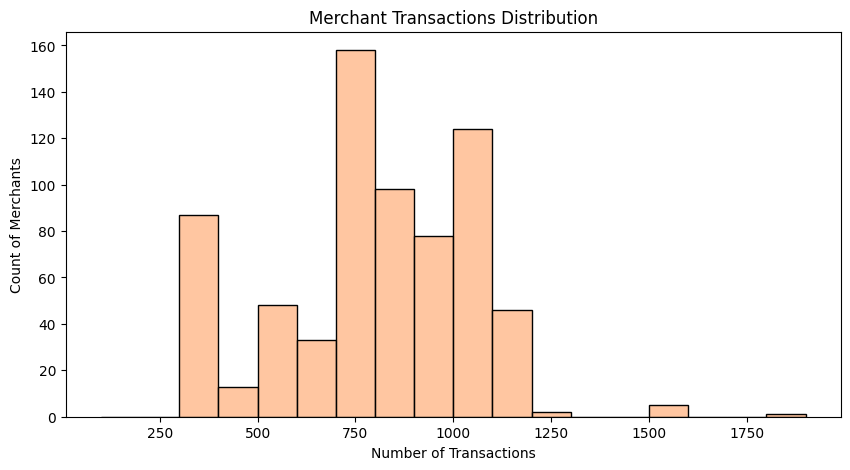

In [15]:
# Creating the layout of the figure for us to add the graph to
fig, ax = plt.subplots(1, 1, figsize = (10, 5))

# Creating histogram as our graph to visualize the distribution of merchant transactions
sns.histplot(data = merchants, x = 'count', bins  = list(np.arange(20)*100)[1:], color = sns.color_palette("pastel")[1])

plt.ylabel('Count of Merchants')
plt.xlabel('Number of Transactions')
plt.title('Merchant Transactions Distribution')
plt.show()

Of the 693 unique merchants, we observe that fraud_Kilback LLC has the highest number of transactions, with 1,859, while fraud_Ritchie, Bradtke and Stledemann has the fewest, with 304. Although there is a significant difference between these two merchants, the distribution shows that most merchants have between 700 and 1,200 transactions. Additionally, a large number of merchants have between 300 and 400 transactions as well. Overall, the distribution of transactions across merchants follows a normal distribution.

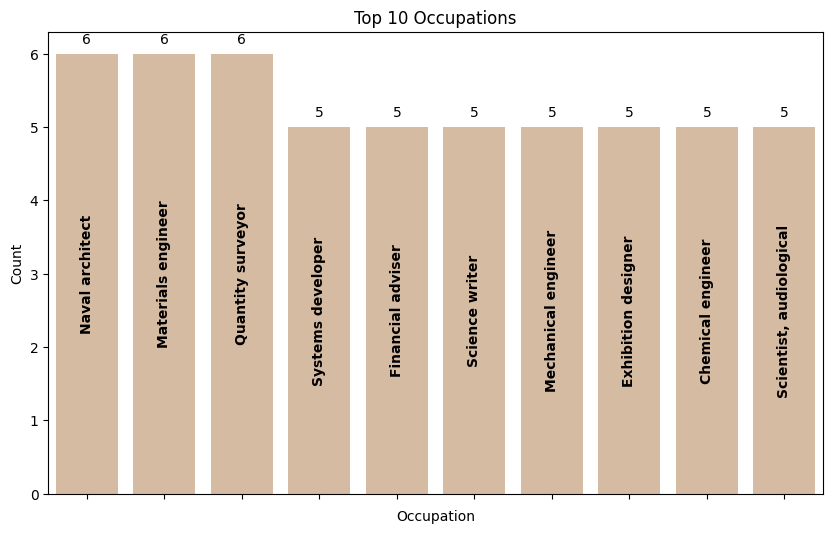

In [16]:
# Creating dataframe for top ten jobs
unique_customers = data.drop_duplicates(subset = ['cc_num'])
jobs = unique_customers['job'].value_counts().to_frame().reset_index().sort_values(by = ['count'], ascending = False)
top_jobs = jobs.iloc[:10]

# Creating the layout of the figure for us to add the graph to
fig, ax = plt.subplots(1, 1, figsize = (10, 6))

# Creating bar plot as our graph to visualize the top ten jobs
sns.barplot(data = top_jobs, y = top_jobs['count'], x = top_jobs['job'], color = sns.color_palette("pastel")[5])

# Adding labels above bars 
for i, value in enumerate(top_jobs['count']):
    ax.text(i, value + 0.1, f'{int(value)}', ha = 'center', va = 'bottom', fontsize = 10)

# Placing the occupation name inside the bar
for i, (job, value) in enumerate(zip(top_jobs['job'], top_jobs['count'])):
    ax.text(i, value / 2, job, ha = 'center', va = 'center', fontsize = 10, color = 'black', fontweight = 'bold', rotation = 90)

ax.set_xticklabels([])
ax.set_xlabel('Occupation')
ax.set_ylabel('Count')
ax.set_title('Top 10 Occupations')
plt.show()

Here we observe that the most common occupations in the dataset are Naval Architect, Materials Engineer, and Quantity Surveyor, each with 6 occurrences. With a total of 478 unique occupations, there is significant variation in job titles across the dataset. Given the high sparsity of the job column, it's unlikely it will contribute meaningful patterns to our model. Therefore, we will exclude the job column during the data preparation phase.

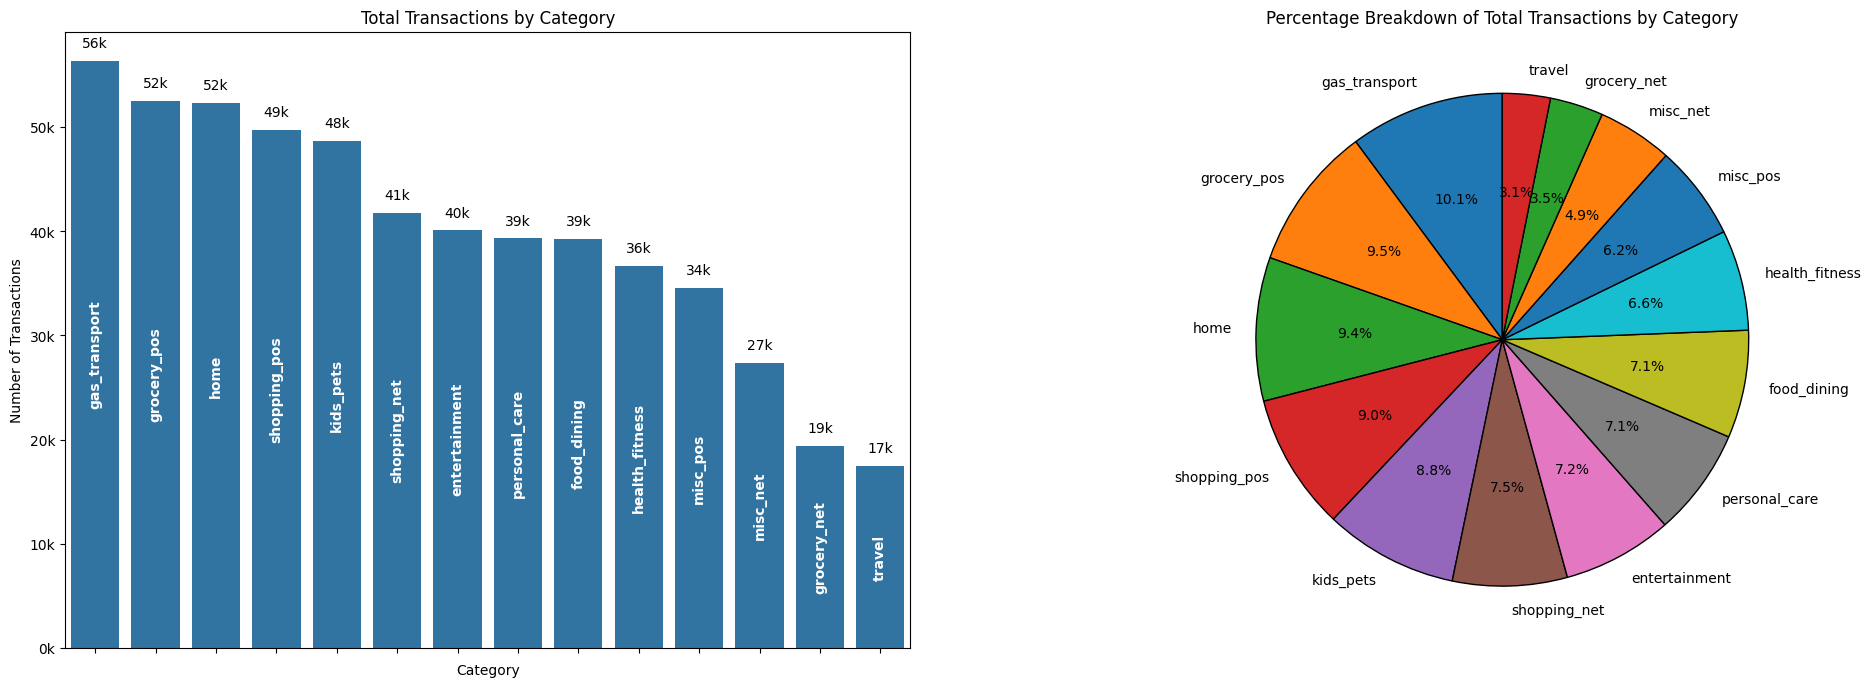

In [17]:
# Creating dataframe for distribution of categories
cat_count = data['category'].value_counts().to_frame().reset_index()

# Creating the layout of the figure for us to add the graphs to
fig, ax = plt.subplots(1, 2, figsize = (24, 8))

# Creating bar plot and pie graph as our graphs to visualize the total number of transactions of categories
sns.barplot(data = cat_count, x = cat_count['category'], y = cat_count['count'], ax = ax[0])
ax[1].pie(cat_count['count'], labels = cat_count['category'], autopct = '%1.1f%%', startangle = 90, wedgeprops = {'edgecolor': 'black'})

# Adding labels above bars
for i, value in enumerate(cat_count['count']):
    ax[0].text(i, value + 1000, f'{int(value / 1000)}k', ha = 'center', va = 'bottom', fontsize=10)

# Placing the category name inside the bar
for i, (category, value) in enumerate(zip(cat_count['category'], cat_count['count'])):
    ax[0].text(i, value / 2, category, ha = 'center', va = 'center', fontsize = 10, color = 'white', fontweight = 'bold', rotation = 90)

ax[0].yaxis.set_major_formatter(FuncFormatter(format_ticks))
ax[0].set_xticklabels([])
ax[0].tick_params(axis = 'x', rotation = 90)
ax[0].set_xlabel('Category')
ax[0].set_ylabel('Number of Transactions')
ax[0].set_title('Total Transactions by Category')
ax[1].set_title('Percentage Breakdown of Total Transactions by Category')
plt.show()

When examining the distribution of transactions by category, we observe that it closely resembles a half-normal distribution. Gas emerges as the most popular category, with 56,000 transactions (10.1%), while Travel represents the lowest, with 17,000 transactions (3.1%). Aside from Travel and Groceries (both around 3%), the percentage breakdown across the remaining categories is relatively even, indicating a representative distribution of transactions across the various categories.

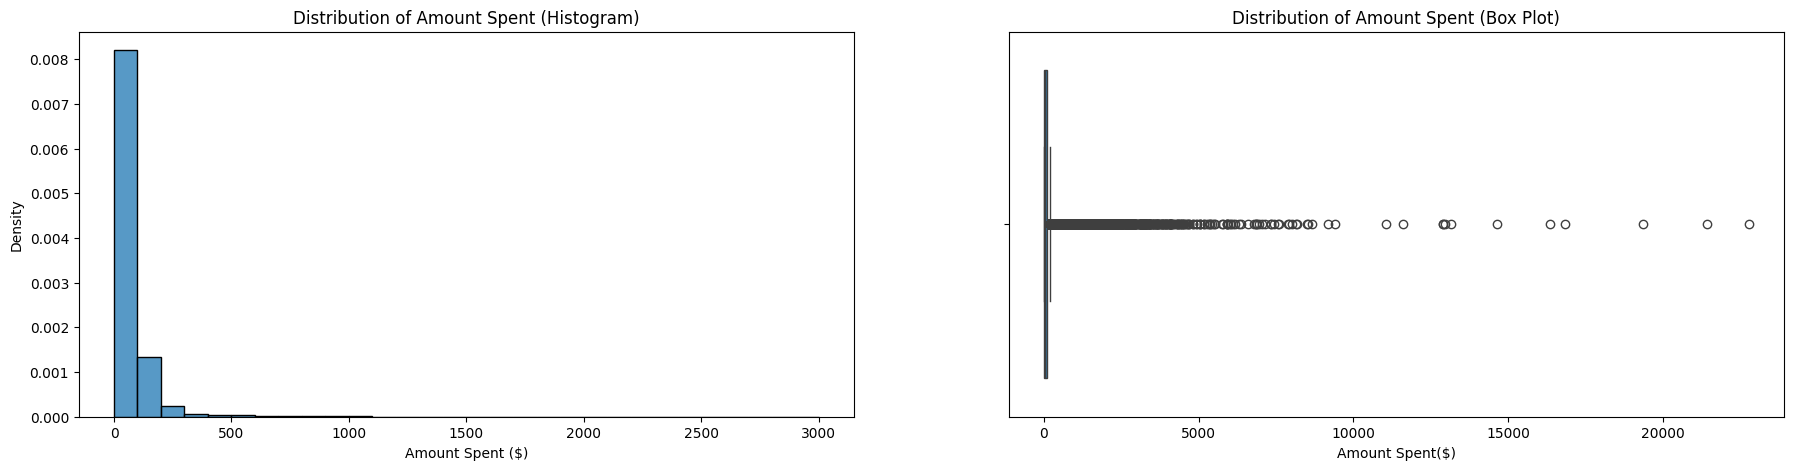

In [18]:
# Creating the layout of the figure for us to add the graphs to
fig, ax = plt.subplots(1, 2, figsize = (22, 5))

# Creating histogram and box plot as our graphs to visualize the distribtuion of amount spent in transactions
sns.histplot(data = data, x = 'amt', ax = ax[0], bins = list(np.arange(31)*100), stat = 'density')
sns.boxplot(data = data, x = 'amt', ax = ax[1])

ax[0].set_xlabel('Amount Spent ($)')
ax[0].set_title('Distribution of Amount Spent (Histogram)')
ax[1].set_xlabel('Amount Spent($)')
ax[1].set_title('Distribution of Amount Spent (Box Plot)')
plt.show()

As mentioned before, the majority of transaction amounts are well below $500, with a strong right skew. Despite there being outliers we will not be removing them from the dataset, as different features vary in distributions. For example, higher transaction amounts may be associated with categories like Travel, suggesting a potential correlation. We will continue to explore the data further to identify and understand these patterns.

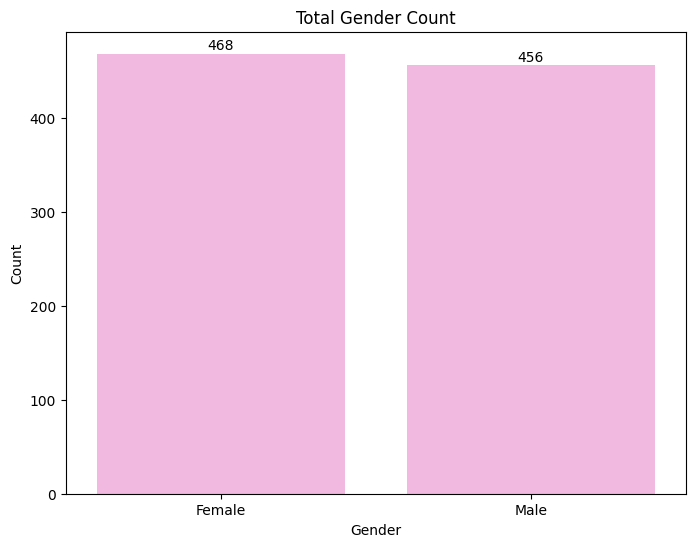

In [19]:
# Creating dataframe for the number of male and female credit card holders
gender = unique_customers['gender'].value_counts().to_frame().reset_index()

# Creating the layout of the figure for us to add the graph to
fig, ax = plt.subplots(1, 1, figsize = (8, 6))

# Creating bar plot as our graph to visualize the number of credit card holders, male and female 
sns.barplot(data = gender, x = gender['gender'], y = gender['count'], color = sns.color_palette("pastel")[6])

# Adding labels above bars
for i, value in enumerate(gender['count']):
    plt.text(i, value + 1, int(value), ha = 'center', va = 'bottom', fontsize = 10)

plt.xticks([0, 1], ['Female', 'Male'])
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Total Gender Count')
plt.show()

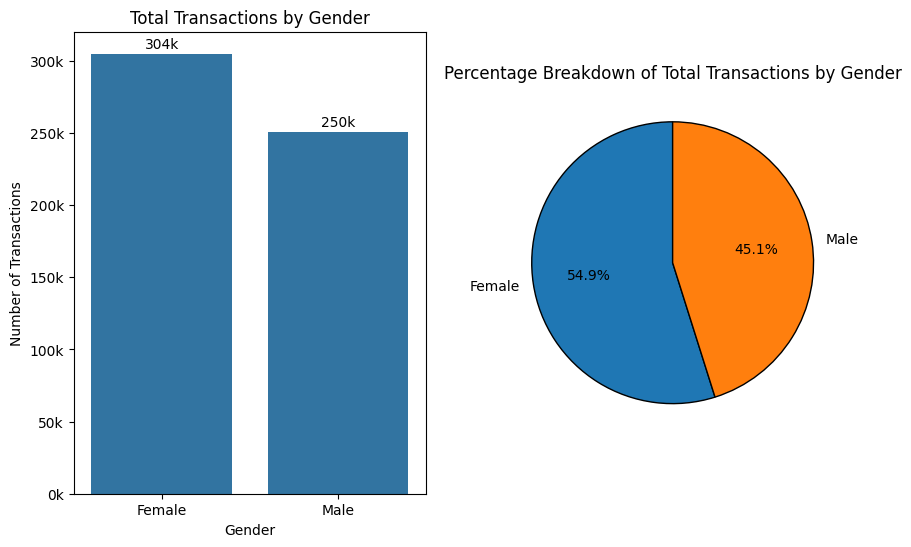

In [20]:
# Creating dataframe for distribution of genders
gender_counts = data['gender'].value_counts().to_frame().reset_index()

# Creating the layout of the figure for us to add the graphs to
fig, ax = plt.subplots(1, 2, figsize = (10, 6))

# Creating bar plot and pie graph as our graphs to visualize the number of transaction by genders
sns.barplot(data = gender_counts, x = gender_counts['gender'], y = gender_counts['count'], ax = ax[0])
ax[1].pie(gender_counts['count'], labels = ['Female', 'Male'], autopct = '%1.1f%%', startangle = 90, wedgeprops = {'edgecolor': 'black'})

# Adding labels above bars
for i, value in enumerate(gender_counts['count']):
    ax[0].text(i, value + 1500, f'{int(value / 1000)}k', ha = 'center', va = 'bottom', fontsize = 10)

ax[0].yaxis.set_major_formatter(FuncFormatter(format_ticks))
ax[0].set_xticklabels(['Female', 'Male'])
ax[0].set_xlabel('Gender')
ax[0].set_ylabel('Number of Transactions')
ax[0].set_title('Total Transactions by Gender')
ax[1].set_title('Percentage Breakdown of Total Transactions by Gender')
plt.show()

We observe that the number of male and female credit card holders is nearly equal. However, a higher number of transactions have been made by female cardholders.

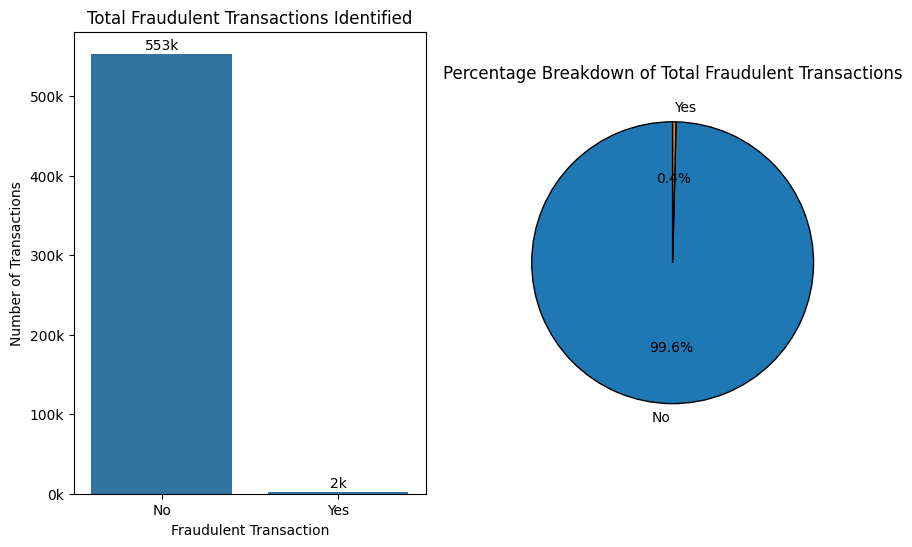

In [21]:
# Creating dataframe for distribution of fraud transactions identified
fraud_counts = data['is_fraud'].value_counts().to_frame().reset_index()

# Creating the layout of the figure for us to add the graphs to
fig, ax = plt.subplots(1, 2, figsize = (10,6))

# Creating bar plot and pie graph as our graphs to visualize the total number of fraud transactions identified
sns.barplot(data = fraud_counts, x = ['No','Yes'], y = fraud_counts['count'], ax = ax[0])
ax[1].pie(fraud_counts['count'], labels = ['No','Yes'], autopct = '%1.1f%%', startangle = 90, wedgeprops = {'edgecolor': 'black'})

# Adding labels above bars
for i, value in enumerate(fraud_counts['count']):
    ax[0].text(i, value + 1500, f'{int(value / 1000)}k', ha = 'center', va = 'bottom', fontsize = 10)

ax[0].yaxis.set_major_formatter(FuncFormatter(format_ticks))
ax[0].set_xlabel('Fraudulent Transaction')
ax[0].set_ylabel('Number of Transactions')
ax[0].set_title('Total Fraudulent Transactions Identified')
ax[1].set_title('Percentage Breakdown of Total Fraudulent Transactions')
plt.show()
plt.show()

As menitioned before, less than 1% of the transactions are fraudulent. Given this significant class imbalance, we will carefully consider this factor when selecting and training our model. We will explore techniques such as oversampling or undersampling designed to handle imbalanced datasets to improve the model's ability to detect fraud effectively.

### Multivariate

In [22]:
# Creating dataframe for the distribution of fraudulent transactions by each state (excluding Hawaii and Alaska for geographical heat map)
states_frauds = data[data['is_fraud'] == 1]['state'].value_counts().to_frame().reset_index()
states_frauds_cont = states_frauds[(states_frauds['state'] != 'HI')&(states_frauds['state'] != 'AK')]
states_fraud_count = states.merge(states_frauds_cont, left_on = 'stusab', right_on = 'state')

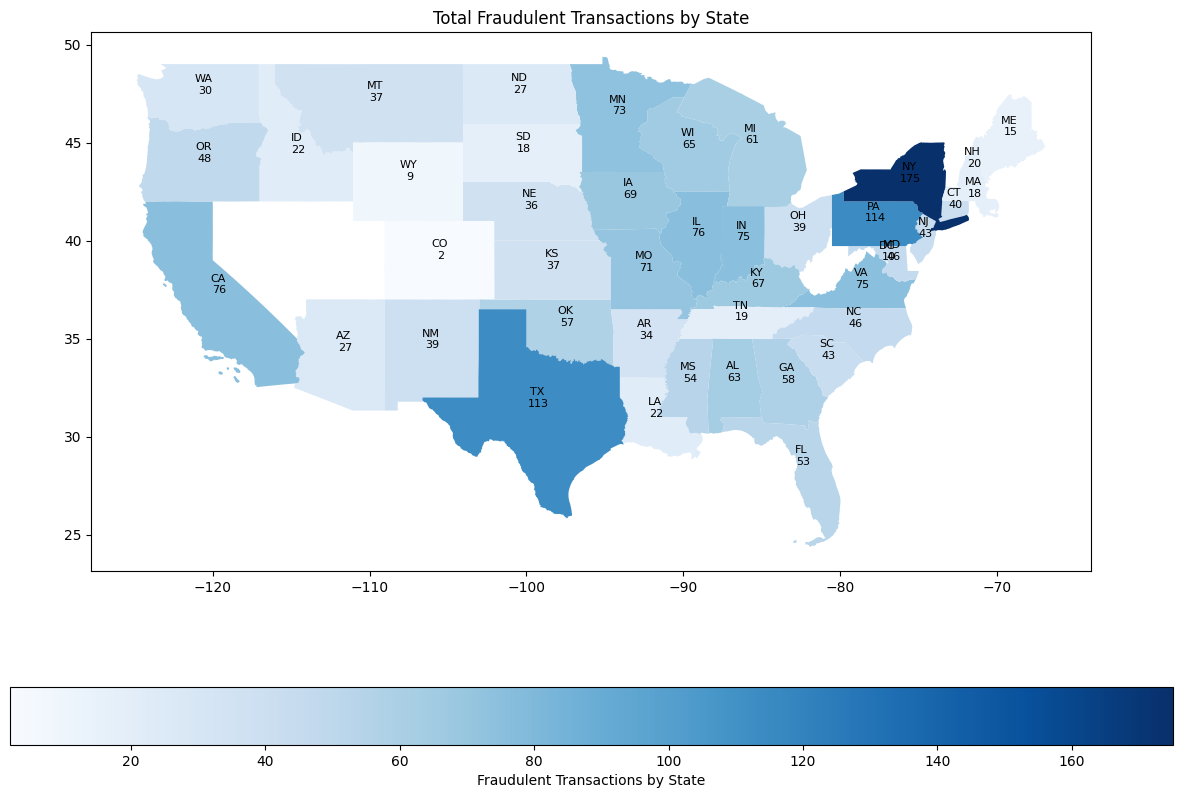

In [23]:
# Creating the layout of the figure for us to add the graph to
fig, ax = plt.subplots(1,1, figsize = (15,10))

# Creating geographical heat map as our visualization to observe the distribution of fraudulent transactions by state
states_fraud_count.plot(column = 'count', ax = ax, legend = True, legend_kwds = {'label': 'Fraudulent Transactions by State', 'orientation': 'horizontal'}, cmap = 'Blues')

# Adding labels for each state 
for idx, row in states_fraud_count.iterrows():
    x, y = row['geometry'].centroid.coords[0]
    ax.text(x + 0.1, y + 0.1, row['count'], fontsize = 8, ha = 'center', color = 'black')
    ax.text(x, y + .7, row['stusab'], fontsize=8, ha = 'center', color = 'black')

plt.title('Total Fraudulent Transactions by State')
plt.show()

Although Texas has the highest total number of transactions, New York reports the highest number of fraudulent transactions. Additionally, Pennsylvania has slightly more fraudulent transactions than Texas. Interestingly, the Midwest region leads in terms of average fraudulent transactions, following its position as the region with the highest average transaction volume overall.

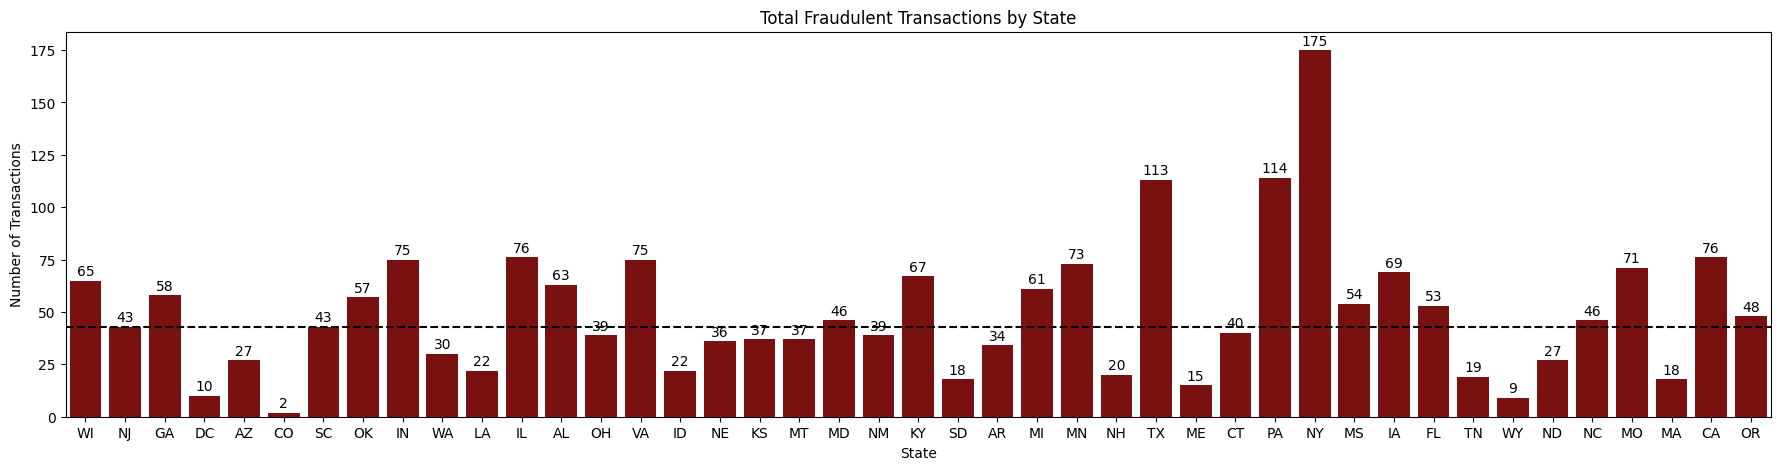

In [24]:
# Calculating the median of state fraudulent transactions
median = np.median(states_frauds['count'])

# Creating the layout of the figure for us to add the graph to
fig, ax = plt.subplots(1,1, figsize = (22,5))

# Creating bar plot as our graph to visualize the distribution of fraudulent transactions by state
sns.barplot(x = states_fraud_count['stusab'], y = states_fraud_count['count'], ax = ax, color = 'Darkred')

# Adding labels above bars
for i, value in enumerate(states_fraud_count['count']):
    plt.text(i, value + 1, f'{int(value)}', ha = 'center', va = 'bottom', fontsize = 10)

plt.axhline(median, color = 'black', linestyle = '--', label = f'Median: {median}')
plt.xlabel('State')
plt.ylabel('Number of Transactions')
plt.title('Total Fraudulent Transactions by State')
plt.show()

The median number of fraudulent transactions by state is 43, and we observe that more states fall below this median compared to the median of total transactions. States such as Colorado, the District of Columbia, Louisiana, South Dakota, New Hampshire, Maine, Tennessee, Wyoming, and Massachusetts have significantly fewer fraudulent transactions than the median. For some of these states, this suggests a lower ratio of fraudulent to non-fraudulent transactions, indicating that fraud is less prevalent in these areas comparitively.

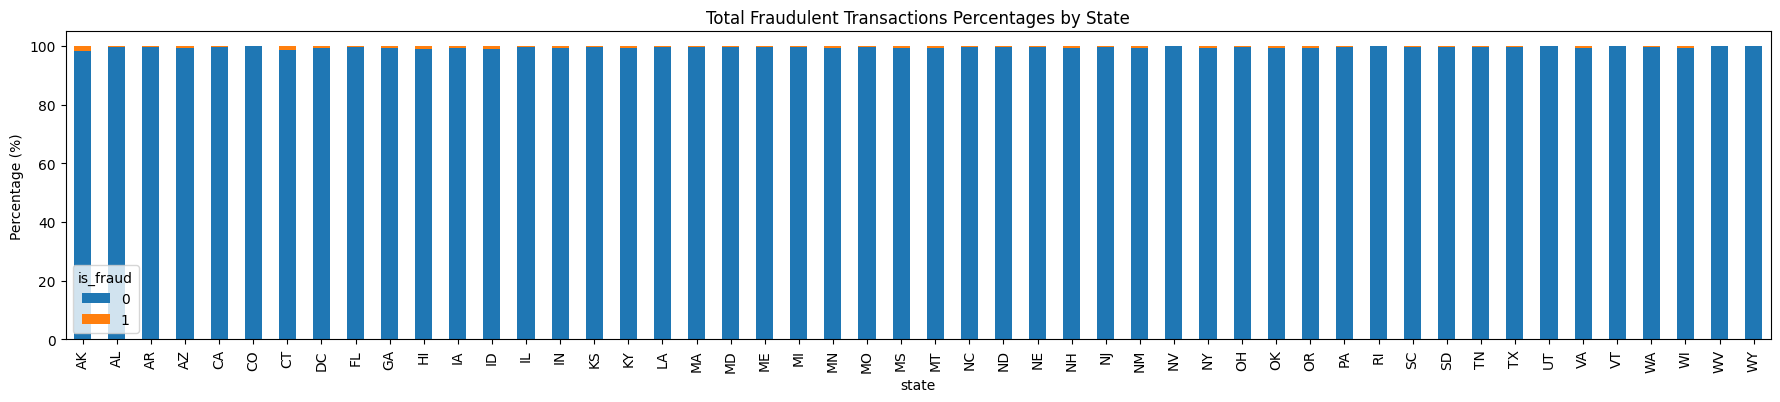

In [25]:
# Creating the layout of the figure for us to add the graph to
fig, ax = plt.subplots(1, 1, figsize = (22,4))

# Creating bar plot as our graph to visualize the percentage breakdown of fraudulent transaction out of total transactions for each state
(pd.crosstab(data['state'], data['is_fraud'], normalize = 'index')*100).plot(kind = 'bar', stacked = True, ax = ax)

plt.ylabel('Percentage (%)')
plt.title('Total Fraudulent Transactions Percentages by State')
plt.show()

However, we observe that, across all states, the percentage of fraudulent transactions are low.

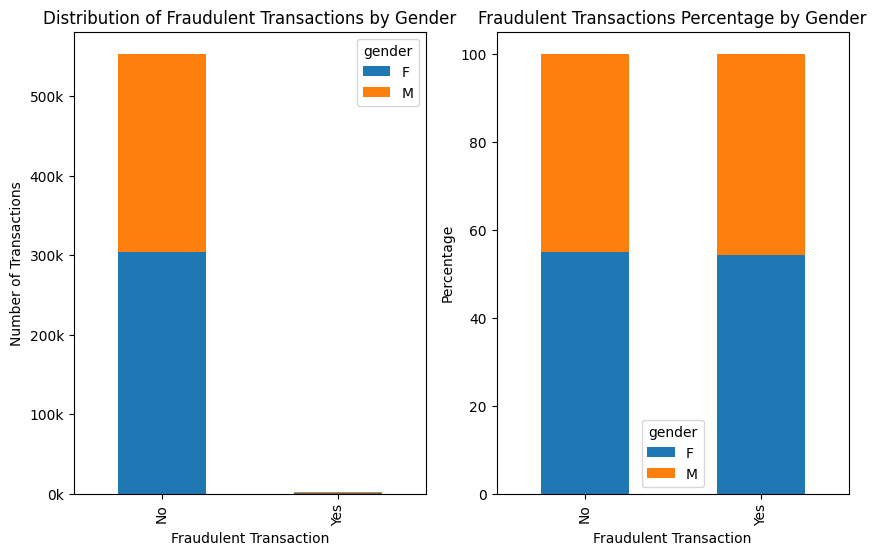

In [26]:
# Creating the layout of the figure for us to add the graphs to
fig, ax = plt.subplots(1, 2, figsize = (10,6))

# Creating bar plot as our graph to visualize the breakdown of fraudulent transaction out of total transactions by gender
(pd.crosstab(data['is_fraud'], data['gender'])).plot(kind = 'bar', stacked = True, ax = ax[0])
(pd.crosstab(data['is_fraud'], data['gender'], normalize = 'index')*100).plot(kind = 'bar', stacked = True, ax = ax[1])

def format_ticks(x, pos):
    return f'{int(x / 1000)}k'

ax[0].yaxis.set_major_formatter(FuncFormatter(format_ticks))
ax[0].set_xticklabels(['No', 'Yes'])
ax[0].set_xlabel('Fraudulent Transaction')
ax[0].set_ylabel('Number of Transactions')
ax[0].set_title('Distribution of Fraudulent Transactions by Gender')
ax[1].set_xticklabels(['No', 'Yes'])
ax[1].set_xlabel('Fraudulent Transaction')
ax[1].set_ylabel('Percentage')
ax[1].set_title('Fraudulent Transactions Percentage by Gender')
plt.show()

Once again, we observe that fraudulent transactions are evenly distributed between genders.

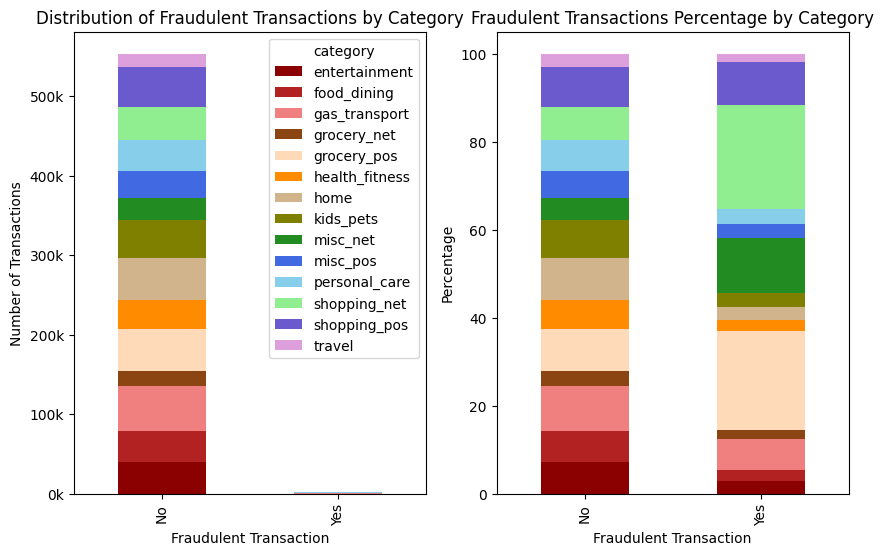

In [27]:
# Creating the layout of the figure for us to add the graphs to
fig, ax = plt.subplots(1, 2, figsize = (10,6))

# Creating bar plots as our graphs to visualize the breakdown of fraudulent transaction out of total transactions by category
(pd.crosstab(data['is_fraud'], data['category'])).plot(kind = 'bar', stacked = True, ax = ax[0], color = ['darkred', 'firebrick', 'lightcoral', 'saddlebrown', 'peachpuff', 'darkorange', 'tan', 'olive', 'forestgreen', 'royalblue', 'skyblue', 'lightgreen', 'slateblue', 'plum'])
(pd.crosstab(data['is_fraud'], data['category'], normalize = 'index')*100).plot(kind = 'bar', stacked = True, ax = ax[1], legend = False, color = ['darkred', 'firebrick', 'lightcoral', 'saddlebrown', 'peachpuff', 'darkorange', 'tan', 'olive', 'forestgreen', 'royalblue', 'skyblue', 'lightgreen', 'slateblue','plum'])

ax[0].yaxis.set_major_formatter(FuncFormatter(format_ticks))
ax[0].set_xticklabels(['No', 'Yes'])
ax[0].set_xlabel('Fraudulent Transaction')
ax[0].set_ylabel('Number of Transactions')
ax[0].set_title('Distribution of Fraudulent Transactions by Category')
ax[1].set_xticklabels(['No', 'Yes'])
ax[1].set_xlabel('Fraudulent Transaction')
ax[1].set_ylabel('Percentage')
ax[1].set_title('Fraudulent Transactions Percentage by Category')
plt.show()

The distribution of transaction categories follows a half-normal distribution, with Gas, Grocery, and Home transactions leading in volume of transactions. However, when observing fraudulent transactions, we see a higher concentration in the Grocery, Shopping, and Miscellaneous (Net) categories. This suggests that fraudulent activity may be more prevalent in certain types of spending, which could help in identifying potential patterns or risk factors.

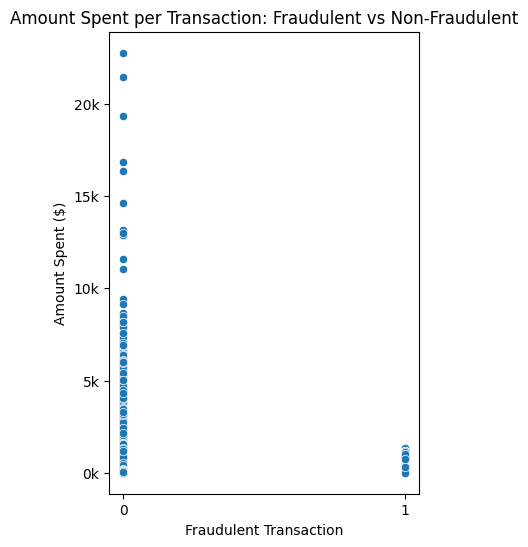

In [28]:
# Creating the layout of the figure for us to add the graphs to
fig, ax = plt.subplots(1, 1, figsize = (4,6))

# Creating plot as our graph to visualize the distribution of amount spent per transaction if fraudulent transaction or not
sns.scatterplot(data = data, x = 'is_fraud', y = 'amt')

plt.gca().yaxis.set_major_formatter(FuncFormatter(format_ticks))
plt.xticks([0, 1])
plt.ylabel('Amount Spent ($)')
plt.xlabel('Fraudulent Transaction')
plt.title('Amount Spent per Transaction: Fraudulent vs Non-Fraudulent')
plt.show()

Here, we observe the distribution of amounts spent on fraudulent transactions and we notice that all fraudulent transactions have spent less than $2,500. This is likely not a coincidence, as most banks implement prevention protocols to flag large transactions. This pattern could serve as a useful feature when training the model, helping to improve its ability to detect fraud.

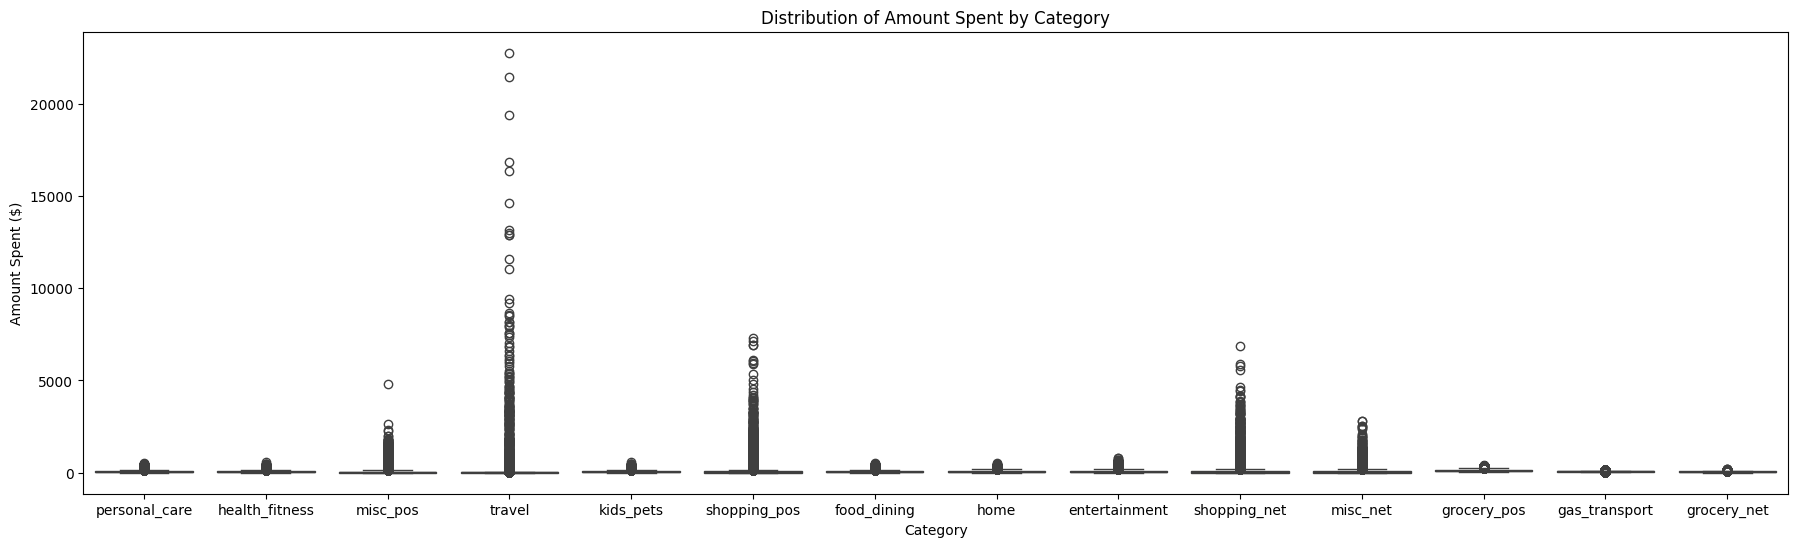

In [29]:
# Creating the layout of the figure for us to add the graphs to
fig, ax = plt.subplots(1, 1, figsize = (22,6))

# Creating plot as our graph to visualize the distribution of amount spend by category
sns.boxplot(data = data, x = 'category', y = 'amt')

plt.ylabel('Amount Spent ($)')
plt.xlabel('Category')
plt.title('Distribution of Amount Spent by Category')
plt.show()

When observing the distribution of amounts spent per category, we observe that the travel category has the largest range and the most outliers, followed by both shopping categories. The miscellaneous categories also show a significant number of outliers, increasing their range, although not as drastically as travel and shopping. This suggests that these categories have larger variances, which could potentially leave more room for fraudulent transactions to occur whereas categories with less variance make it easier to detect fraudulent transactions, as transactions falling far outside the expected range are more easily flagged.

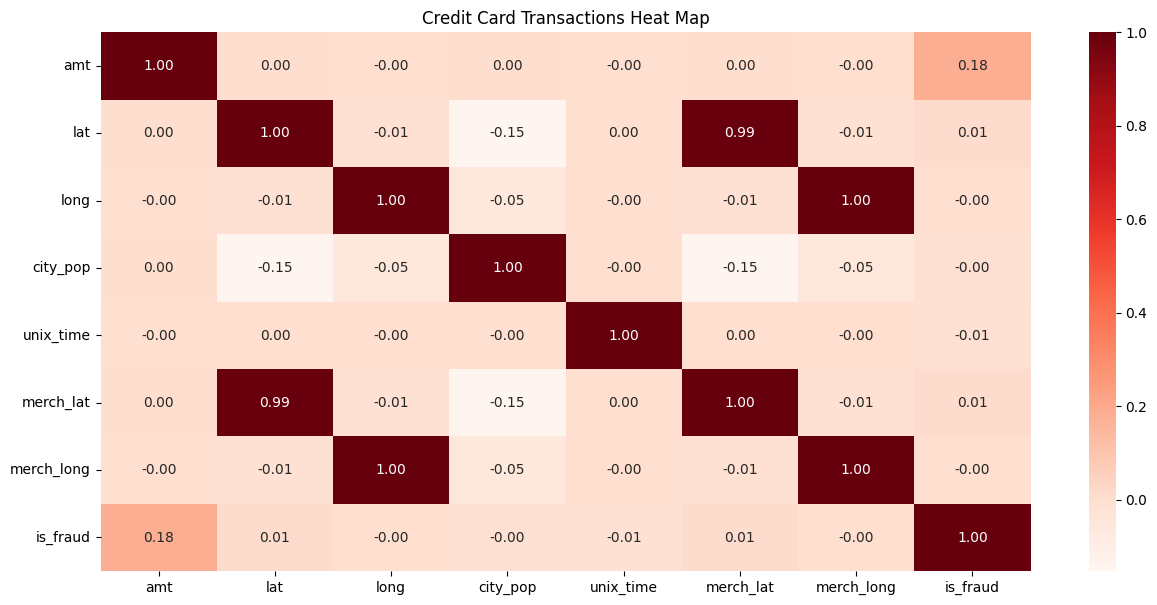

In [30]:
# Selecting columns that contain numeric data types from the set we removed the unecessary columns from
numeric_data = data_counts.select_dtypes(include = ['float64', 'int64'])

# Creating heatmap as our graph to visualize the correlation of all numerical variables
plt.figure(figsize = (15, 7))

sns.heatmap(numeric_data.corr(), annot = True, fmt = '.2f', cmap = 'Reds')

plt.title('Credit Card Transactions Heat Map')
plt.show()

Looking at the heatmap, we observe that there are no variables with strong positive or negative correlations. As a result, there are no significant patterns or insights to be extracted from the heatmap in terms of feature relationships.

## **Data Preparation**

In [31]:
# Importing encoder to encode the dataset and scaler to normalize
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Importing library to split data into training and testing sets
from sklearn.model_selection import train_test_split

In [32]:
# Removing unnecessary columns
data_ = data.drop(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'first', 'last', 'street', 'city', 'state', 'zip', 'trans_num', 'dob', 'job'], axis = 1)

Given the mix of columns with different data types, we will apply a combination of frequency encoding and one-hot encoding to prepare the data for model processing. Specifically, we will use frequency encoding for the merchant column, and one-hot encoding for the gender and category columns.

In [33]:
# Frequency encoding merchant column
merchant_frequency = data_['merchant'].value_counts()
data_['encoded_merchant'] = data_['merchant'].map(merchant_frequency)

# dropping non encoded columns 
data_ = data_.drop(['merchant'], axis = 1)

# One hot encoding gender and category columns
data_ = pd.get_dummies(data_, columns = ['gender', 'category'], drop_first = True)

In [34]:
data_.head()

,amt,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud,encoded_merchant,gender_M,...,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
0,2.8600,33.9659,-80.9355,333497,1371816865,33.9864,-81.2007,0,736,True,...,False,False,False,False,False,False,True,False,False,False
1,29.8400,40.3207,-110.4360,302,1371816873,39.4505,-109.9604,0,785,False,...,False,False,False,False,False,False,True,False,False,False
2,41.2800,40.6729,-73.5365,34496,1371816893,40.4958,-74.1961,0,755,False,...,False,True,False,False,False,False,False,False,False,False
3,60.0500,28.5697,-80.8191,54767,1371816915,28.8124,-80.8831,0,711,True,...,False,False,False,False,False,True,False,False,False,False
4,3.1900,44.2529,-85.0170,1126,1371816917,44.9591,-85.8847,0,370,True,...,False,False,False,False,False,False,False,False,False,True


In [35]:
# Separating fraud identifitier column from  
x = data_.drop(['is_fraud'], axis = 1)
y = data_['is_fraud']

# Splitting data for modeling
x_train, x_test, y_train, y_test = train_test_split(x, y , stratify = y, test_size = 0.3, random_state = 42)

## **Model Selection & Training**

We will select and build a model to predict fraudulent activity. When evaluating the model's performance, it's important to consider the different possible outcomes:

- True Positive (TP): The model predicts fraud, and the transaction is indeed fraudulent.
- True Negative (TN): The model predicts no fraud, and the transaction is not fraudulent.
- False Positive (FP): The model predicts fraud, but the transaction is actually not fraudulent.
- False Negative (FN): The model predicts no fraud, but the transaction is actually fraudulent.

In this context, banks would prioritize minimizing false negatives to avoid overlooking fraudulent transactions. Consequently, our focus will be on improving recall as the primary scoring metric for the models. We will develop seven different types of models and then evaluate and recommend the best model based on the bank’s strategic business needs.

In [36]:
# Importing libraries to get metric scores
from sklearn.metrics import confusion_matrix, classification_report, f1_score, accuracy_score, recall_score, precision_score

# Importing libraries for different models
from sklearn.linear_model import LogisticRegression

from sklearn.svm import SVC

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Importing libraries to tune the model
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_score

# Importing libraries for more models to oversample and undersample
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import TomekLinks
from imblearn.combine import SMOTETomek
from imblearn.pipeline import Pipeline, make_pipeline

In [37]:
# Creating function to measure metrics for models and printing out accuracy heat map
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))
    
    cm = confusion_matrix(actual, predicted)

    plt.figure(figsize = (8,5))
    
    sns.heatmap(cm, annot = True, fmt = '.2f', xticklabels = ['Not Fraud', 'Fraud'], yticklabels = ['Not Fraud', 'Fraud'])

    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

In [38]:
# Fitting logistic regression model
lg = LogisticRegression()
lg.fit(x_train, y_train)

LogisticRegression()

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    166072
           1       0.00      0.00      0.00       644

    accuracy                           1.00    166716
   macro avg       0.50      0.50      0.50    166716
weighted avg       0.99      1.00      0.99    166716



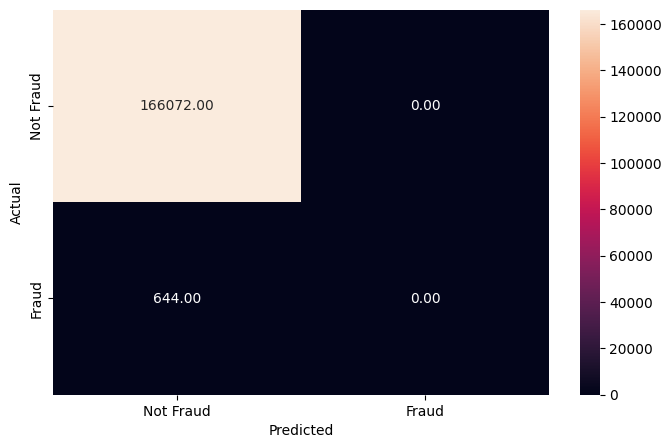

In [39]:
# Checking the performance on the test data for logistic regression model using metrics function
y_pred_test = lg.predict(x_test)

metrics_score(y_test, y_pred_test)

# Saving the results to put into a dataframe
lg_recall = recall_score(y_test, y_pred_test)
lg_precision = precision_score(y_test, y_pred_test)
lg_f1 = f1_score(y_test, y_pred_test)
lg_accuracy = accuracy_score(y_test, y_pred_test)

Here we observe that the Logistic Regression model is not identifying any fraudulent transactions. This is likely due to the significant class imbalance between fraudulent and non-fraudulent transactions, which impairs the model's ability to detect fraud effectively. Given its poor performance in this scenario, we can confidently discard this model as it does not provide meaningful insights for fraud detection.

In [40]:
# Fitting decision tree classifier model
model_dt = DecisionTreeClassifier(random_state = 1, max_depth = 8)
model_dt.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=8, random_state=1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    166072
           1       0.73      0.66      0.69       644

    accuracy                           1.00    166716
   macro avg       0.87      0.83      0.85    166716
weighted avg       1.00      1.00      1.00    166716



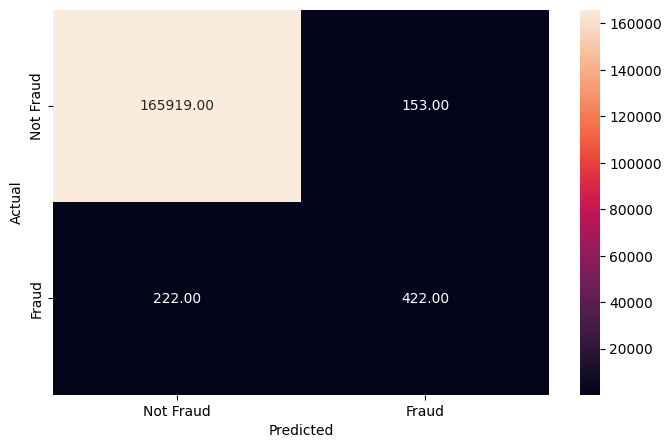

In [41]:
# Checking the performance on the test data for desicion tree classifier model using metrics function
y_pred_test = model_dt.predict(x_test)

metrics_score(y_test, y_pred_test)

# Saving the results to put into a dataframe
dt_recall = recall_score(y_test, y_pred_test)
dt_precision = precision_score(y_test, y_pred_test)
dt_f1 = f1_score(y_test, y_pred_test)
dt_accuracy = accuracy_score(y_test, y_pred_test)

Despite the class imbalance, we observe that the Decision Tree model performs significantly better. Decision trees are effective at reducing impurity as they split the nodes, helping to reduce the bias towards the majority class. With a recall score of 0.66, the Decision Tree provides a solid foundation for our goal of improving recall and detecting fraudulent transactions more effectively.

In [42]:
# Fitting random forest classifier model
rf = RandomForestClassifier(n_estimators = 100, random_state = 1)

rf.fit(x_train, y_train)

RandomForestClassifier(random_state=1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    166072
           1       0.88      0.60      0.72       644

    accuracy                           1.00    166716
   macro avg       0.94      0.80      0.86    166716
weighted avg       1.00      1.00      1.00    166716



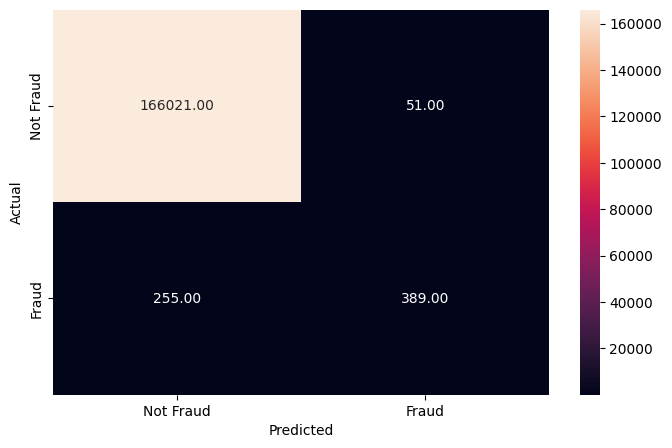

In [43]:
# Checking the performance on the test data for random forest classifier model using metrics function
y_pred_test = rf.predict(x_test)

metrics_score(y_test, y_pred_test)

# Saving the results to put into a dataframe
rf_recall = recall_score(y_test, y_pred_test)
rf_precision = precision_score(y_test, y_pred_test)
rf_f1 = f1_score(y_test, y_pred_test)
rf_accuracy = accuracy_score(y_test, y_pred_test)

After observing that the Decision Tree outperforms the Logistic Regression model, we proceed to build a Random Forest classification model for better generalization. While the Decision Tree performed slightly better on this particular dataset, the Random Forest is likely to perform more robustly across different datasets due to its ensemble nature. In this case, recall only dropped to 0.60, which is still a great result. However, we aim to further optimize the model and address the class imbalance.

To start, we will implement Stratified K-Folds cross-validation. This approach ensures that the data is split into even folds while maintaining the same ratio of fraudulent to non-fraudulent transactions in each fold. This technique helps make sure the model is trained on representative subsets, improving its ability to detect fraud effectively.

In [44]:
# Initializing StratifiedKFolds as our form of cross validation
kf = StratifiedKFold(n_splits = 5, shuffle = False)

In [45]:
# Performing cross validation with the random forest classifier model  
score = cross_val_score(rf, x_train, y_train, cv = kf, scoring = 'recall')

# Printing recall scores for all cross validations and the average recall score for all cross validations
print('Cross Validation Recall Score: {}'.format(score))
print('Average Cross Validation Recall Score: {}'.format(score.mean()))

Cross Validation Recall Score: [0.47333333 0.59666667 0.53488372 0.55333333 0.53333333]
Average Cross Validation Recall Score: 0.5383100775193798


After applying Stratified K-Folds cross-validation, we observe that the recall for our Random Forest classifier averages 0.54 across the folds. While recall has decreased, our model’s generalization has improved as we apply best practices for training the model. However, there is still room for improvement and we will optimize the Random Forest classifier to enhance its performance.

In [46]:
# Optimizing random forest classifier model 
params = {'n_estimators': [ 50, 100, 200], 'max_depth': [4, 6, 10, 12], 'random_state': [1]}

optimized_rf = GridSearchCV(rf, param_grid = params, cv = kf, scoring = 'recall').fit(x_train, y_train)

# Printing best recall score and best combination of parameters leading to best recall score
print(optimized_rf.best_score_)
print(optimized_rf.best_params_)

0.4516788482834994
{'max_depth': 12, 'n_estimators': 100, 'random_state': 1}


              precision    recall  f1-score   support

           0       1.00      1.00      1.00    166072
           1       0.89      0.47      0.62       644

    accuracy                           1.00    166716
   macro avg       0.95      0.74      0.81    166716
weighted avg       1.00      1.00      1.00    166716



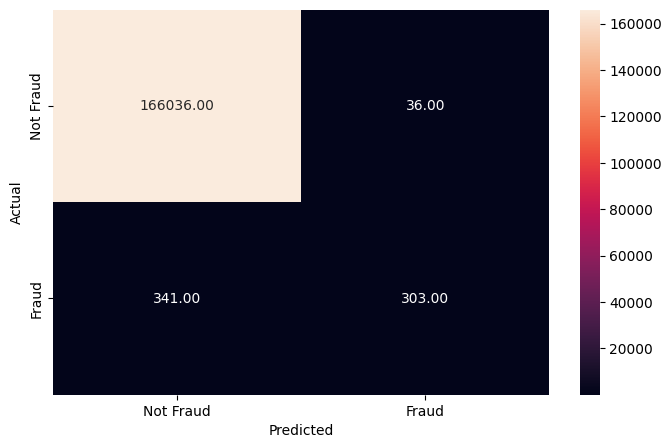

In [47]:
# Checking the performance on the test data for optimized random forest classifier model using metrics function 
y_pred_test = optimized_rf.predict(x_test)

metrics_score(y_test, y_pred_test)

# Saving the results to put into a dataframe
opt_rf_recall = recall_score(y_test, y_pred_test)
opt_rf_precision = precision_score(y_test, y_pred_test)
opt_rf_f1 = f1_score(y_test, y_pred_test)
opt_rf_accuracy = accuracy_score(y_test, y_pred_test)

After optimizing our Random Forest classifier and applying K-Folds cross-validation, we observe that recall only reaches 0.47. While the model’s generalization improves, we have not improved in recall. To address this, we will apply additional techniques to help mitigate the class imbalance and strengthen the model.

The first technique we will implement is random oversampling. This method involves duplicating random fraudulent transactions in the dataset, thereby increasing the representation of fraud transactions for the model to learn from.

In [48]:
# Creating pipeline that applies random oversampling to the dataset followed by a random forest classifier
random_oversample_pipeline = make_pipeline(RandomOverSampler(random_state = 42), RandomForestClassifier(n_estimators = 100, random_state = 1))

# Performing cross validation with the pipeline
os_score = cross_val_score(random_oversample_pipeline, x_train, y_train, scoring = 'recall', cv = kf)

# Printing recall scores for all cross validations and the average recall score for all cross validations
print('Cross Validation Recall Score: {}'.format(os_score))
print('Average Cross Validation Recall Score: {}'.format(os_score.mean()))

Cross Validation Recall Score: [0.58       0.64666667 0.61461794 0.65666667 0.6       ]
Average Cross Validation Recall Score: 0.6195902547065338


In [49]:
# Optimizing random forest classifier from random oversample pipeline
new_params = {'randomforestclassifier__' + key: params[key] for key in params}

optimized_oversample = GridSearchCV(random_oversample_pipeline, param_grid = new_params, cv = kf, scoring = 'recall', return_train_score = True)

optimized_oversample.fit(x_train, y_train)

# Printing best recall score and best combination of parameters leading to best recall score
print(optimized_oversample.best_score_)
print(optimized_oversample.best_params_)

0.8587685492801773
{'randomforestclassifier__max_depth': 12, 'randomforestclassifier__n_estimators': 200, 'randomforestclassifier__random_state': 1}


              precision    recall  f1-score   support

           0       1.00      0.99      0.99    166072
           1       0.22      0.89      0.35       644

    accuracy                           0.99    166716
   macro avg       0.61      0.94      0.67    166716
weighted avg       1.00      0.99      0.99    166716



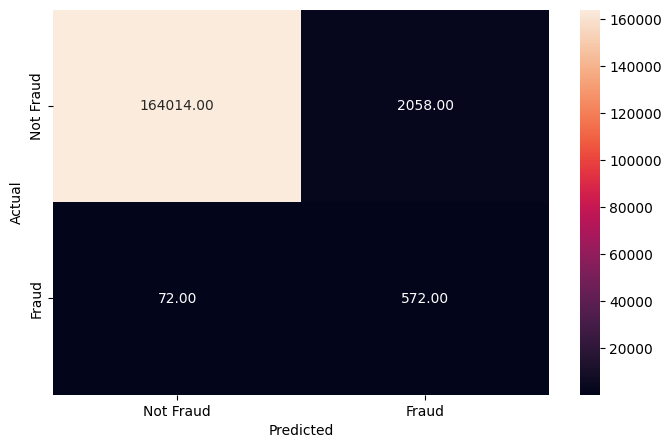

In [50]:
# Checking the performance on the optimized random forest classifier from random oversample pipeline
y_pred_test = optimized_oversample.predict(x_test)

metrics_score(y_test, y_pred_test)

# Saving the results to put into a dataframe
opt_oversample_recall = recall_score(y_test, y_pred_test)
opt_oversample_precision = precision_score(y_test, y_pred_test)
opt_oversample_f1 = f1_score(y_test, y_pred_test)
opt_oversample_accuracy = accuracy_score(y_test, y_pred_test)

After applying random oversampling, we observe a significant increase in our model's recall to 0.89, which supports our goal of improving recall.

While random oversampling has proven effective, we will also apply another technique to further address the class imbalance: Synthetic Minority Oversampling Technique (SMOTE). SMOTE generates synthetic fraudulent transactions by creating new samples through combinations of features from existing fraud cases in the dataset, providing a different way to enhance the representation of fraud transactions for the model to learn from.

In [51]:
# Creating pipeline that applies synthetic minority oversampling technique (SMOTE) to the dataset followed by a random forest classifier
smote_pipeline = make_pipeline(SMOTE(random_state = 42), RandomForestClassifier(n_estimators = 100, random_state = 1))

smote_score = cross_val_score(smote_pipeline, x_train, y_train, scoring = 'recall', cv = kf)

# Printing recall scores for all cross validations and the average recall score for all cross validations
print('Cross Validation Recall Score: {}'.format(smote_score))
print('Average Cross Validation Recall Score: {}'.format(smote_score.mean()))

Cross Validation Recall Score: [0.62666667 0.68666667 0.64119601 0.69       0.63666667]
Average Cross Validation Recall Score: 0.6562392026578073


In [52]:
# Optimizing random forest classifier from SMOTE pipeline
new_params = {'randomforestclassifier__' + key: params[key] for key in params}

optimized_smote = GridSearchCV(smote_pipeline, param_grid = new_params, cv = kf, scoring = 'recall', return_train_score = True)

optimized_smote.fit(x_train, y_train)

# Printing best recall score and best combination of parameters leading to best recall score
print(optimized_smote.best_score_)
print(optimized_smote.best_params_)

0.7688239202657808
{'randomforestclassifier__max_depth': 12, 'randomforestclassifier__n_estimators': 200, 'randomforestclassifier__random_state': 1}


              precision    recall  f1-score   support

           0       1.00      0.98      0.99    166072
           1       0.15      0.82      0.25       644

    accuracy                           0.98    166716
   macro avg       0.57      0.90      0.62    166716
weighted avg       1.00      0.98      0.99    166716



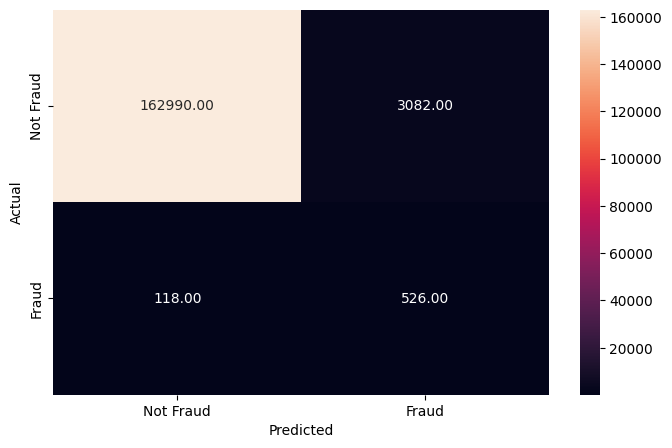

In [53]:
# Checking the performance on the optimized random forest classifier from SMOTE pipeline
y_pred_test = optimized_smote.predict(x_test)

metrics_score(y_test, y_pred_test)

# Saving the results to put into a dataframe
opt_smote_recall = recall_score(y_test, y_pred_test)
opt_smote_precision = precision_score(y_test, y_pred_test)
opt_smote_f1 = f1_score(y_test, y_pred_test)
opt_smote_accuracy = accuracy_score(y_test, y_pred_test)

After applying SMOTE, we observe that the model performs well with a recall of 0.82. However, random oversampling is still performing the best in terms of recall, with SMOTE being a close second.

Both random oversampling and SMOTE are techniques aimed at increasing the occurrences of the minority class (fraudulent transactions), but another approach involves reducing the occurrences of the majority class. To achieve this, we will apply Tomek Links, a technique that removes instances of the majority class based on their similarity to other majority class instances. For the next model, we will combine SMOTE with Tomek Links to see whether this hybrid approach will result in improved performance.

In [54]:
# Creating pipeline that applies SMOTE and Tomek Links undersampling to the dataset followed by a random forest classifier
smote_tomek_pipeline = make_pipeline(SMOTETomek(tomek = TomekLinks(sampling_strategy = 'majority')), RandomForestClassifier(n_estimators = 100, random_state = 1))

smote_tomek_score = cross_val_score(smote_tomek_pipeline, x_train, y_train, scoring = 'recall', cv = kf)

# Printing recall scores for all cross validations and the average recall score for all cross validations
print('Cross Validation Recall Score: {}'.format(smote_tomek_score))
print('Average Cross Validation Recall Score: {}'.format(smote_tomek_score.mean()))

Cross Validation Recall Score: [0.63       0.69       0.64451827 0.68333333 0.64333333]
Average Cross Validation Recall Score: 0.6582369878183831


              precision    recall  f1-score   support

           0       1.00      1.00      1.00    166072
           1       0.68      0.73      0.70       644

    accuracy                           1.00    166716
   macro avg       0.84      0.86      0.85    166716
weighted avg       1.00      1.00      1.00    166716



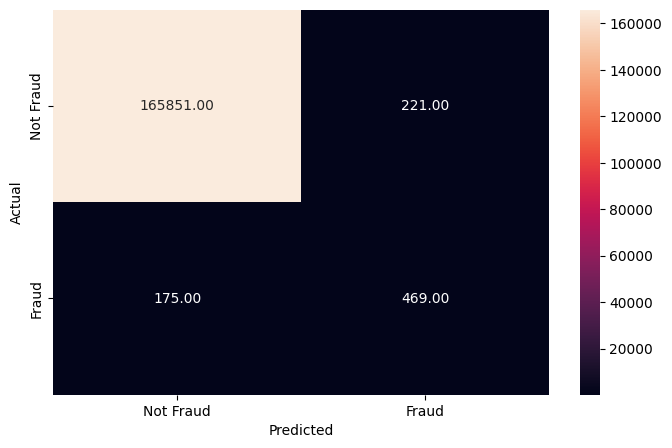

In [55]:
# Fitting training data to SMOTE Tomek pipeline
smote_tomek_pipeline.fit(x_train, y_train)

# Checking the performance on the random forest classifier from SMOTE Tomek pipeline
y_pred_test = smote_tomek_pipeline.predict(x_test)

metrics_score(y_test, y_pred_test)

# Saving the results to put into a dataframe
st_recall = recall_score(y_test, y_pred_test)
st_precision = precision_score(y_test, y_pred_test)
st_f1 = f1_score(y_test, y_pred_test)
st_accuracy = accuracy_score(y_test, y_pred_test)

After applying a combination of SMOTE and Tomek Links, we observe that the model's recall has dropped to 0.73. While this decrease in recall is noted, the overall performance of the model remains strong.

As the final step in improving the model, we will adjust the class weights in the Random Forest classifier. By assigning higher weights to the minority class (fraudulent transactions), the model will place more importance on correctly identifying fraud during training, which should help further improve performance.

In [56]:
# Initiating random forest classifier with class weights
rfb = RandomForestClassifier(n_estimators = 100, random_state = 1, class_weight = 'balanced')

rfb_score = cross_val_score(rfb, x_train, y_train, scoring = 'recall', cv = kf)

# Printing recall scores for all cross validations and the average recall score for all cross validations
print('Cross Validation Recall Score: {}'.format(rfb_score))
print('Average Cross Validation Recall Score: {}'.format(rfb_score.mean()))

Cross Validation Recall Score: [0.47666667 0.57333333 0.52491694 0.58333333 0.49      ]
Average Cross Validation Recall Score: 0.5296500553709856


In [57]:
# Optimizing random forest classifier with class weights
optimized_rfb = GridSearchCV(rfb, param_grid = params, cv = kf, scoring = 'recall').fit(x_train, y_train)

# Printing best recall score and best combination of parameters leading to best recall score
print(optimized_rfb.best_score_)
print(optimized_rfb.best_params_)

0.8094684385382059
{'max_depth': 12, 'n_estimators': 100, 'random_state': 1}


              precision    recall  f1-score   support

           0       1.00      0.99      1.00    166072
           1       0.29      0.84      0.43       644

    accuracy                           0.99    166716
   macro avg       0.64      0.92      0.71    166716
weighted avg       1.00      0.99      0.99    166716



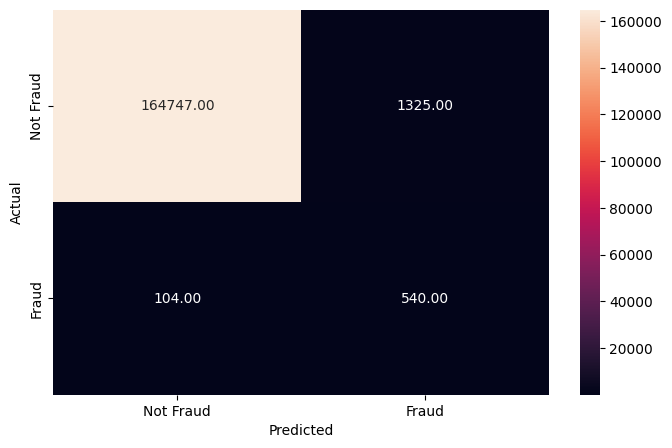

In [58]:
# Checking the performance on the optimized random forest classifier with class weights
y_pred_test = optimized_rfb.predict(x_test)

metrics_score(y_test, y_pred_test)

# Saving the results to put into a dataframe
opt_rfb_recall = recall_score(y_test, y_pred_test)
opt_rfb_precision = precision_score(y_test, y_pred_test)
opt_rfb_f1 = f1_score(y_test, y_pred_test)
opt_rfb_accuracy = accuracy_score(y_test, y_pred_test)

After adjusting the class weights in the Random Forest classifier, we observe that recall increases to a strong 0.84.

In [59]:
# Creating dataframe from all metrics saved 
model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Random Oversampling', 'SMOTE', 'SMOTE-Tomek', 'Class Weights']
recalls = [lg_recall, dt_recall, opt_rf_recall, opt_oversample_recall, opt_smote_recall, st_recall, opt_rfb_recall]
precisions = [lg_precision, dt_precision, opt_rf_precision, opt_oversample_precision, opt_smote_precision, st_precision, opt_rfb_precision]
f1s = [lg_f1, dt_f1, opt_rf_f1, opt_oversample_f1, opt_smote_f1, st_f1, opt_rfb_f1]
accuracys = [lg_accuracy, dt_accuracy, opt_rf_accuracy, opt_oversample_accuracy, opt_smote_accuracy, st_accuracy, opt_rfb_accuracy]

comparison_df = pd.DataFrame({'Model_names': model_names, 'Recall_score': recalls, 'Precision_score': precisions, 'F1_score': f1s, 'Accuracy_score': accuracys})
comparison_df

,Model_names,Recall_score,Precision_score,F1_score,Accuracy_score
0,Logistic Regression,0.0000,0.0000,0.0000,0.9961
1,Decision Tree,0.6553,0.7339,0.6924,0.9978
2,Random Forest,0.4705,0.8938,0.6165,0.9977
3,Random Oversampling,0.8882,0.2175,0.3494,0.9872
4,SMOTE,0.8168,0.1458,0.2474,0.9808
5,SMOTE-Tomek,0.7283,0.6797,0.7031,0.9976
6,Class Weights,0.8385,0.2895,0.4305,0.9914


## **Conclusion**:


In conclusion, we developed and evaluated various models to detect fraudulent activity. From our final comparison dataframe, we observe that Logistic Regression performed the worst, while Random Oversampling achieved the best recall, which aligns with our goal of minimizing missed fraudulent transactions (false negatives). However, it is essential to present all models to the bank and help them understand the differences, as each model could serve different purposes depending on the business priorities.

Additionally, we recommend that the bank consider further tuning of the models and provide more data to address the class imbalance. Through our exploratory data analysis (EDA), we identified certain regions with higher fraudulent activity, which could inform the bank's decision-making process by offering additional guardrails in these areas. Moreover, based on our findings, we suggest that the bank maintain their protocols for large transactions, as these protocols help prevent fraud. It would also be beneficial to focus on transactions under the limit for better model performance.

Finally, we strongly recommend that the bank implement the Random Oversampling model, as it demonstrated the best performance in terms of recall.